In [4]:
#importing the libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
from collections import Counter
import scipy.stats as stats

In [5]:
#reading the original dataset 
df1 = pd.read_csv('Life Expectancy Data.csv')
df1

FileNotFoundError: [Errno 2] No such file or directory: 'Life Expectancy Data.csv'

In [ ]:
#reading all the columns of the dataset
df1.columns

In [ ]:
#describing the original dataset 
df1.describe()

In [ ]:
#checking for null cells in the original dataset
df1.isna().sum()

### There  are empty cells in the given dataset so we drop the empty cells

In [ ]:
#Dropping null cells and renamin some rows in the dataset to generate new dataset from the original one
df2 = df1.dropna()
old_colnames=df2.columns
new_colnames=['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult Mortality', 'Infant Deaths', 'Alcohol', 'Expenditure%', 'Hepatitis_B', 'Measles', 'BMI', 'Under five Deaths', 'Polio', 'Total Expenditure', 'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years ', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
df2=df2.rename(columns=dict(zip(old_colnames,new_colnames))).round(1)
df2

In [ ]:
#printing the first five rows of the dataset
df2.head(5)

In [ ]:
#printing the last five rows of the new dataset
df2.tail()

In [ ]:
#descriptive statistics of the new dataset
df2.describe()

In [ ]:
#highest populations over the years
df2[['Country', 'Year','Population']].head()

In [ ]:
#lowest populations over the years
df2[['Country','Year', 'Population']].tail()

### The countries with the highest and the lowest average life expectancies over the years

In [ ]:
#1 countries with average life expectancy rates
group_country_life_exp = df2.groupby(['Country'])['Life_Expectancy'].mean().round(2).sort_values(ascending=False)
group_country_life_exp

In [ ]:
#2 The top 7 countries with the highest average life expectancy rates
group_country_life_exp.head()

In [ ]:
#1 The bottom 7 countries with the highest average life expectancy rates
group_country_life_exp.tail()

### Total GDP of each country recorded over the years

In [ ]:
# sum of GDP
group_country_GDP = df2.groupby(['Country'])['GDP'].sum().round(2).sort_values(ascending=False)
group_country_GDP

In [ ]:
# Top seven countries with the highest sum of  GDP
group_country_GDP.head()

In [ ]:
#Bottom seven countries with the highest sum of  GDP
group_country_GDP.tail()

###  Total number of  deaths of each countries over the years

In [ ]:
#Adult Mortality of the countries
Adult_Mort = df2.groupby(['Country'])['Adult Mortality'].sum().round(2).sort_values(ascending=False)
Adult_Mort

In [ ]:
# The first five highest adult mortality over the years
cb=Adult_Mort.head()
cb

In [ ]:
#The last five highest adult mortality over the years
Adult_Mort.tail()

In [ ]:
#under five deaths
under_5_deaths = df2.groupby(['Country'])['Under five Deaths'].mean().round(2).sort_values(ascending=False)
under_5_deaths

In [ ]:
#top 5 countries with the highest under five deaths
under_5_deaths.head()

In [ ]:
#bottom 5 under five deaths
under_5_deaths.tail(5)

### Countries which recorded the most and least sickness on average over the years

In [ ]:

disease = df2[['Country', 'HIV/AIDS', 'Hepatitis_B', 'Measles', 'Polio']]
disease

In [ ]:
c_hiv = df2.groupby(['Country'])['HIV/AIDS'].mean().round(2).sort_values(ascending=False)
c_hiv

In [ ]:
# Top five HIV dominated countries
a=c_hiv.head()
a

In [ ]:
# Bottom five HIV dominated countries
c_hiv.tail()

In [ ]:
country_hb = df2.groupby(['Country'])['Hepatitis_B'].sum().round(2).sort_values(ascending=False)
country_hb

In [ ]:
#top five nations with the highest Hepatitis_B 
country_hb.head()

In [ ]:

country_hb.tail()

In [ ]:
country_measles = df2.groupby(['Country'])['Measles'].sum().round(2).sort_values(ascending=False)
country_measles

In [ ]:
# Top five Highest recorded number of measles
country_measles.head()

In [ ]:
# Five lowest recorded Measles
country_measles.tail()

In [ ]:
Country_Polio = df2.groupby(['Country'])['Polio'].mean().round(2).sort_values(ascending=False)
Country_Polio

In [ ]:
#highest number of polios recorded
Country_Polio.head()

In [ ]:
# Lowest number of polios recorded
Country_Polio.tail()

### Checking for relationship between some of the variables in the dataset

In [6]:
# adult mortality and hiv correlation
cor_tion = df2[['Adult Mortality', 'HIV/AIDS']].corr()
cor_tion

NameError: name 'df2' is not defined

In [7]:
# under five deaths and measles correlation
cor_tion = df2[['Under five Deaths', 'Measles']].corr()
cor_tion

NameError: name 'df2' is not defined

In [8]:
# infant deaths and polio correlation
cor_tion = df2[['Infant Deaths', 'Polio']].corr()
cor_tion

NameError: name 'df2' is not defined

## VISUALIZING SOME OF THE OUTCOMES OF THE DATASET

In [9]:
#scatterplot showing relationship between life expectancy and schooling
x = df2.Schooling
y = df2.Life_Expectancy
plt.xlabel("Schooling")
plt.ylabel('Life_Expectancy')
plt.scatter(x, y)
plt.show()

NameError: name 'df2' is not defined

NameError: name 'df2' is not defined

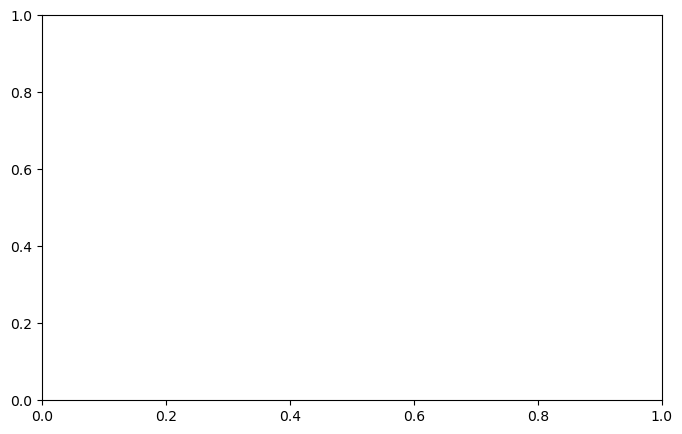

In [10]:
## Looking at distribution of rating

fig, ax = plt.subplots(figsize=[8,5])
sb.distplot(df2['Life_Expectancy'], ax=ax)

#giving a title
ax.set_title('Distribution of Rating')

plt.show()

In [11]:
df2['Life_Expectancy'].mode()

NameError: name 'df2' is not defined

In [12]:
df2['Life_Expectancy'].mean()

NameError: name 'df2' is not defined

In [13]:
df2[['Life_Expectancy','GDP']].corr()

NameError: name 'df2' is not defined

In [14]:
b=df2['Life_Expectancy']
b

NameError: name 'df2' is not defined